In [3]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2


In [7]:
from tensorflow.keras.losses import MeanAbsoluteError

model = load_model('Age_Sex_Detection.h5', custom_objects={'mae': MeanAbsoluteError()})


In [43]:
# Choose the layer to visualize
layer_name = 'conv2d_1'  # Replace with your layer's name
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)


In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np

#img_path = "D:/juli/archive (4)/UTKFace/1_0_0_20161219140627985.jpg.chip.jpg"  # replace with your actual image path
img_path = "D:/juli/archive (4)/UTKFace/70_0_0_20170111200707164.jpg.chip.jpg"

# Load image and resize to 48x48 (model's expected input size)
img = image.load_img(img_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if needed (based on training)


In [83]:
# Get the feature maps
feature_maps = intermediate_layer_model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


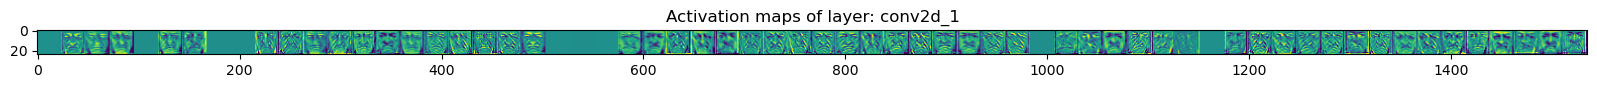

In [85]:
# Plot the activation maps
num_filters = feature_maps.shape[-1]
size = feature_maps.shape[1]

# Display the feature maps
display_grid = np.zeros((size, size * num_filters))
for i in range(num_filters):
    x = feature_maps[0, :, :, i]
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 64
    x += 128
    x = np.clip(x, 0, 255).astype('uint8')
    display_grid[:, i * size : (i + 1) * size] = x

scale = 20. / num_filters
plt.figure(figsize=(scale * num_filters, scale))
plt.title(f'Activation maps of layer: {layer_name}')
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()


In [35]:
print(model.input_shape)



(None, 48, 48, 3)


In [37]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 32)        │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 48, 48, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 32)        │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 24, 24, 32)        │               0 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 64)        │          18,496 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 24, 24, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 64)        │               0 │ activation_1[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 12, 12, 64)        │               0 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 128)       │          73,856 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 12, 12, 128)       │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 128)         │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 6, 6, 128)         │               0 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 6, 6, 256)         │         295,168 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 6, 6, 256)         │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 3, 3, 256)         │               0 │ activation_3[0][0]         │
│ (MaxPooling2D)                │                           │               

 Total params: 683,588 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


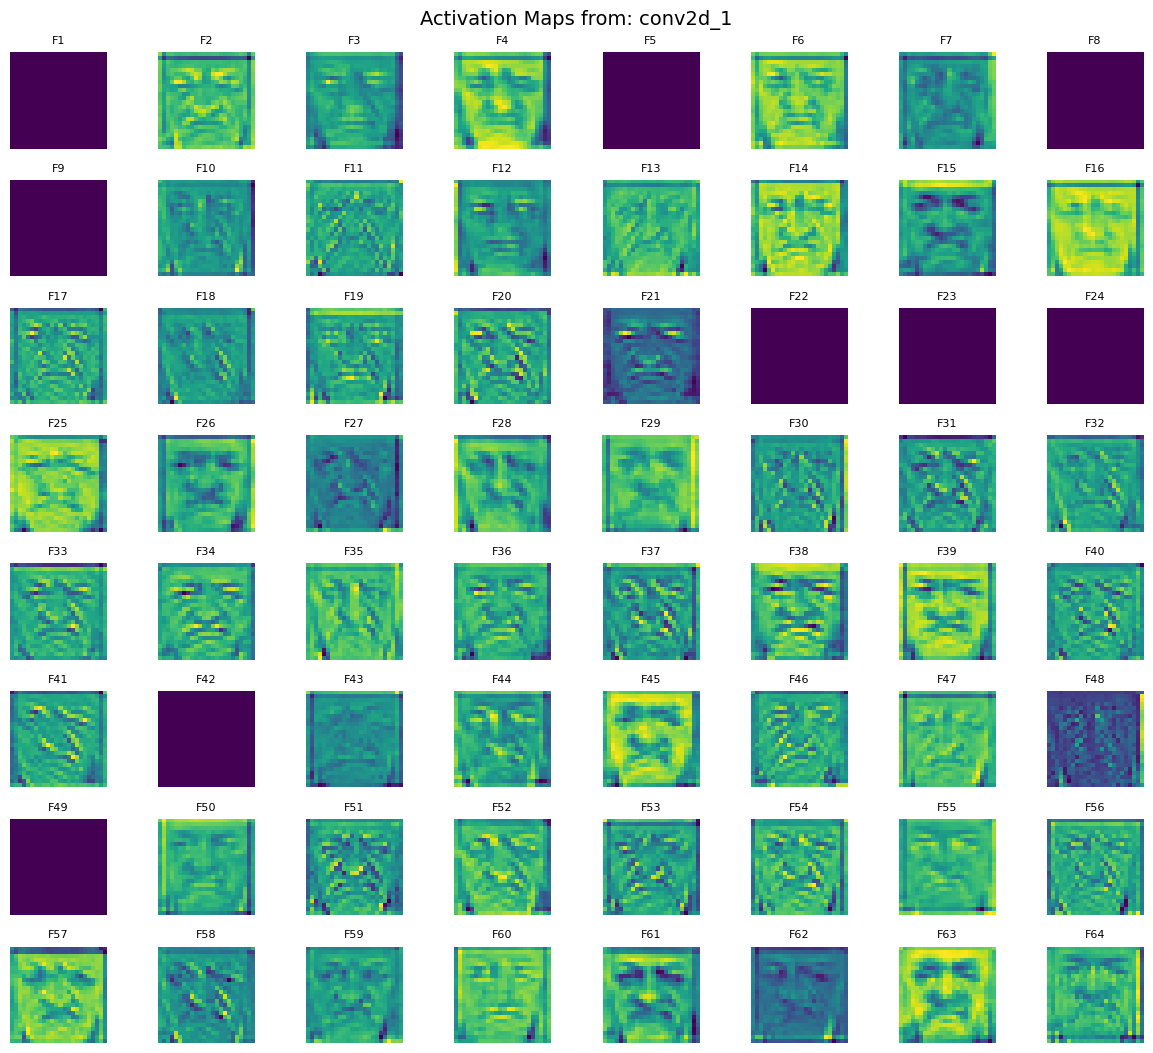

In [87]:
layer_name = 'conv2d_1'
activation_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

feature_maps = activation_model.predict(img_array)


num_filters = feature_maps.shape[-1]
figsize = 12
cols = 8
rows = num_filters // cols + 1

plt.figure(figsize=(figsize, figsize))
for i in range(num_filters):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f'F{i+1}', fontsize=8)
plt.suptitle(f'Activation Maps from: {layer_name}', fontsize=14)
plt.tight_layout()
plt.show()